In [3]:
import qiskit
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import Aer
from qiskit import transpile
from qiskit.visualization import circuit_drawer, plot_bloch_multivector, plot_histogram
from qiskit.visualization import plot_state_city, plot_state_qsphere
#plot_state_city is for density matrix plot
#plot_state_qsphere used for multi qubit visualization
from math import pi, sqrt
import pylatexenc
from pylatexenc.latex2text import LatexNodes2Text

## Basic Qiskit Information
## All qubits in Qiskit starts from the state |0> by default
### Qiskit uses little endian ordering system for both classical bit and quantum bit ordering. This means that for 3 qubits q0, q1, and q2, the qiskit ordering is reversed as q2, q1, and q0. Same is for classical bits as well.

# Quantum CNOT/CX Gate

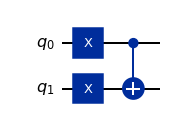

In [4]:
# CX-gate on |11> = |01> (|01> according to Qiskit ordering)
# since CX gate won't change |00> and |01> we apply it to |11>
qc_cx = QuantumCircuit(2, name= "qc")
qc_cx.x(0) # X gate on 1st qubit
qc_cx.x(1) # X gate on 2nd qubit
# This means both qubits are set to ∣1⟩ because the default initial state of qubits in Qiskit is ∣0⟩
qc_cx.cx(0,1) #CX gate with the 1st qubit as control and 2nd qubit as target
qc_cx.draw("mpl")

# Density matrix for CNOT gate


Quantum state is:  Statevector([0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))


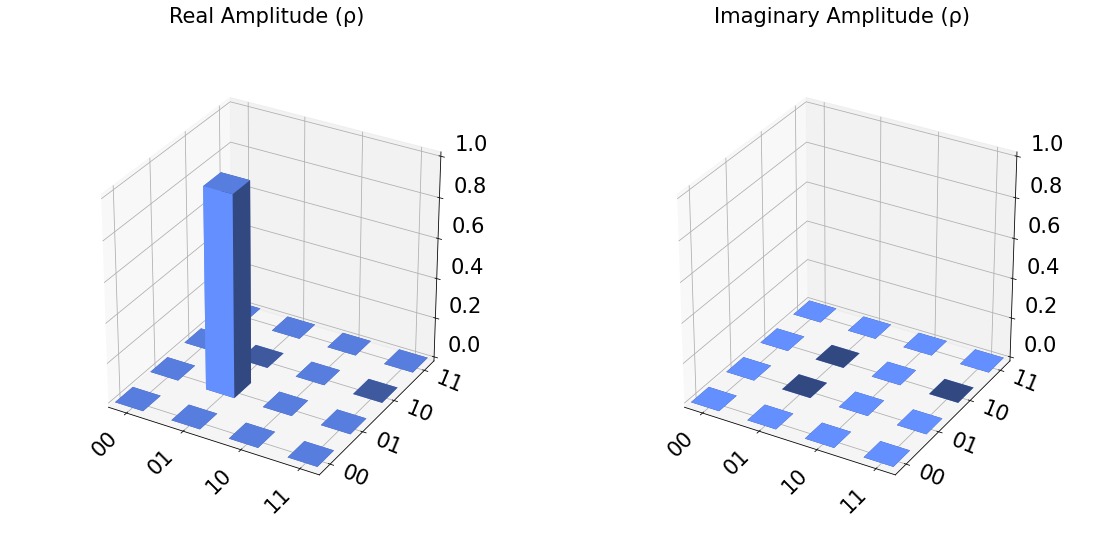

In [7]:
# to get the eigenvector you should use the statevecto simulator in the core of the circuit
simulator_state = Aer.get_backend('statevector_simulator')

#execute the circuit
cx_gate = transpile(qc_cx, simulator_state)
job = simulator_state.run(cx_gate)

#grab results from the job
result = job.result()

#returns counts
psi= result.get_statevector(qc_cx)
print("\nQuantum state is: ", psi)

#plot a density matrix_plot
plot_state_city(psi)


#important: the result of CX|11> = |10> but since Qiskit is following little endian order it shows |01>

# QSphere plot for CX gate

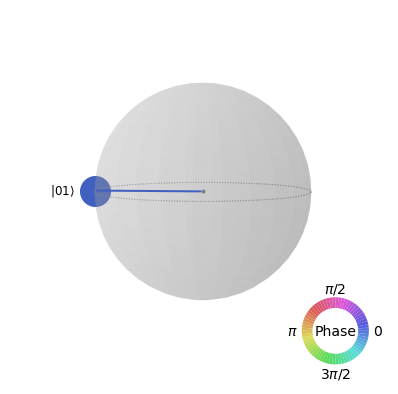

In [9]:
psi = result.get_statevector(qc_cx)
plot_state_qsphere(psi)
#bulb thickness tells about the probability of the occurance

# Unitary operator for CX/CNOT gate

In [12]:
backend = Aer.get_backend('unitary_simulator')

#execute the circuit
cx_unitary = transpile(qc_cx, backend)
job = backend.run(cx_unitary)
job.result().get_unitary(qc_cx, decimals = 3)

Operator([[0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


# Running CNOT gate circuit using QASM simulator

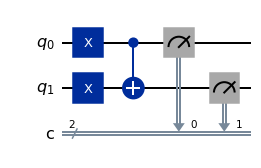

In [15]:
# CNOT with measurement
qc_cx = QuantumCircuit(2, 2, name = "qc")
qc_cx.x(0)
qc_cx.x(1)
qc_cx.cx(0,1)
qc_cx.measure([0,1], [0,1])
qc_cx.draw('mpl')

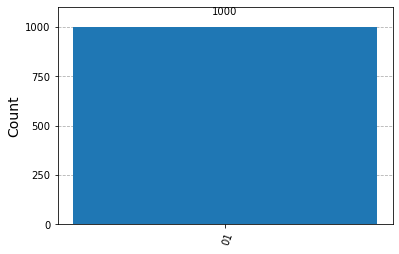

In [20]:
# Use Aer's qasm_simulator
backend = Aer.get_backend('qasm_simulator')

histo_job = transpile(qc_cx, backend)

job = backend.run(histo_job, shots = 1000)

result = job.result()

counts = result.get_counts(qc_cx)

plot_histogram (counts)

# CNOT gate using CZ and Hadamard gates

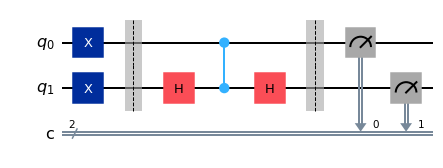

In [22]:
#another way of showing CNOT
qc_cx = QuantumCircuit(2, 2, name = "qc")
qc_cx.x(0)
qc_cx.x(1)
qc_cx.barrier()
qc_cx.h(1) # H gate on 2nd qubit
qc_cx.cz(0,1) #cz gate
qc_cx.h(1) # H gate on 2nd qubit
qc_cx.barrier()
qc_cx.measure([0,1], [0,1])
qc_cx.draw('mpl')

# Quantum CZ gate

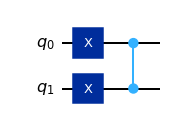

In [23]:
# CZ- gate on |11> = -|11> (|11> according to Qiskit ordering)
qc_cz = QuantumCircuit(2, name = "qc")
qc_cz.x(0)
qc_cz.x(1)
qc_cz.cz(0,1) # cz gate with 1st qubit as control and 2nd qubit as Target
qc_cz.draw('mpl')


# Density matrix for CZ gate


Quantum state is:  Statevector([ 0.+0.j,  0.+0.j,  0.+0.j, -1.+0.j],
            dims=(2, 2))


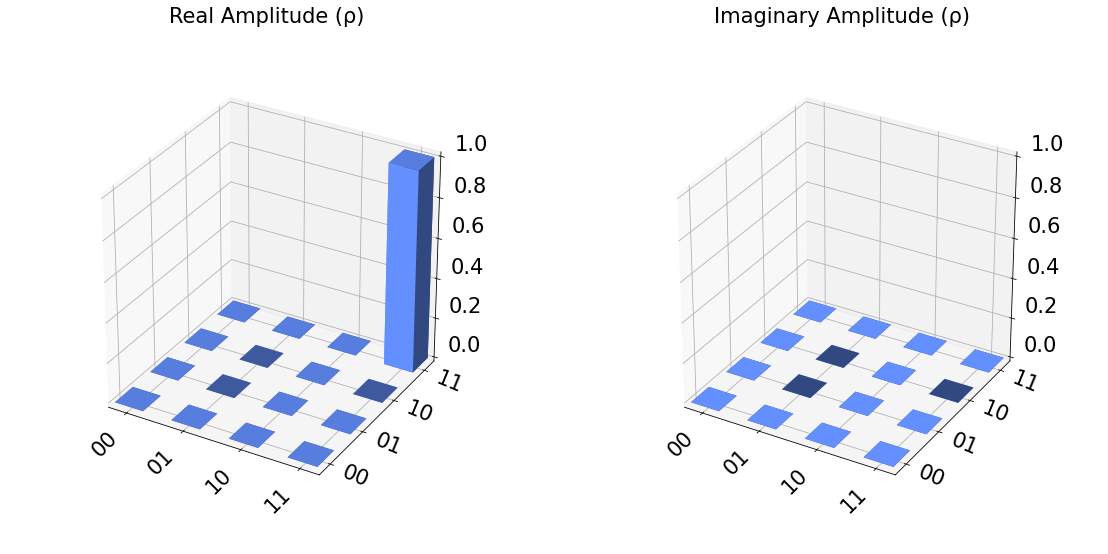

In [24]:
# to get the eigenvector you should use the statevecto simulator in the core of the circuit
simulator_state = Aer.get_backend('statevector_simulator')

#execute the circuit
cz_gate = transpile(qc_cz, simulator_state)
job = simulator_state.run(cz_gate)

#grab results from the job
result = job.result()

#returns counts
psi= result.get_statevector(qc_cz)
print("\nQuantum state is: ", psi)

#plot a density matrix_plot
plot_state_city(psi)


#important: the result of CZ|11> = -|11> but Qiskit shows |11>

# QSphere plot for CX gate

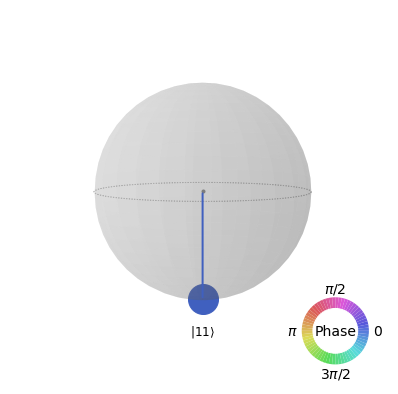

In [25]:
psi = result.get_statevector(qc_cz)
plot_state_qsphere(psi)
#bulb thickness tells about the probability of the occurance

# Unitary operator for CZ gate

In [26]:
backend = Aer.get_backend('unitary_simulator')

#execute the circuit
cz_unitary = transpile(qc_cz, backend)
job = backend.run(cz_unitary)
job.result().get_unitary(qc_cz, decimals = 3)

Operator([[ 0.+0.j,  0.+0.j,  0.+0.j,  1.+0.j],
          [ 0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j],
          [ 0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j],
          [-1.+0.j, -0.+0.j, -0.+0.j, -0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


# Running CZ gate circuit using QASM simulator

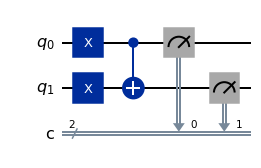

In [27]:
# CNOT with measurement
qc_cz = QuantumCircuit(2, 2, name = "qc")
qc_cz.x(0)
qc_cz.x(1)
qc_cz.cx(0,1)
qc_cz.measure([0,1], [0,1])
qc_cz.draw('mpl')

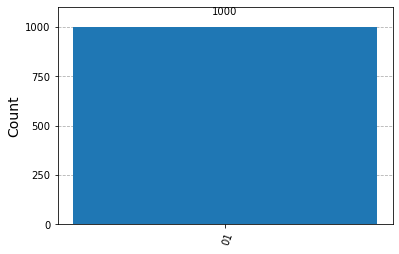

In [28]:
# Use Aer's qasm_simulator
backend = Aer.get_backend('qasm_simulator')

histo_job = transpile(qc_cz, backend)

job = backend.run(histo_job, shots = 1000)

result = job.result()

counts = result.get_counts(qc_cz)

plot_histogram (counts)

# CZ gate using CNOT and Hadamard Gates

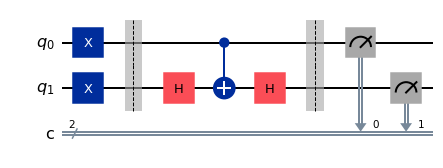

In [30]:
qc_cz = QuantumCircuit(2, 2, name = "qc")
qc_cz.x(0)
qc_cz.x(1)
qc_cz.barrier()
qc_cz.h(1) # H gate on 2nd qubit
qc_cz.cx(0,1) #CNOT gate
qc_cz.h(1) # H gate on 2nd qubit
qc_cz.barrier()
qc_cz.measure([0,1], [0,1])
qc_cz.draw('mpl')

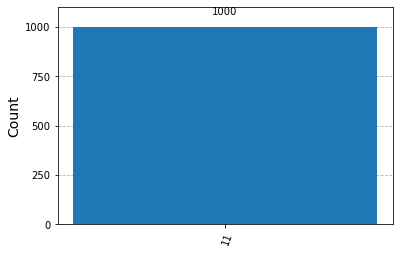

In [31]:
# Use Aer's qasm_simulator
backend = Aer.get_backend('qasm_simulator')

histo_job = transpile(qc_cz, backend)

job = backend.run(histo_job, shots = 1000)

result = job.result()

counts = result.get_counts(qc_cz)

plot_histogram (counts)

# Quantum CH Gate: Control Hadamard Gate

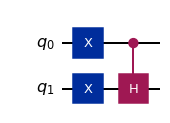

In [32]:
# CH-gate on |11>
qc_ch = QuantumCircuit(2, name = "qc")
qc_ch.x(0) # X gate on 1st qubit
qc_ch.x(1) # X gate on 2nd qubit
qc_ch.ch(0,1) # ch gate with 1st qubit as control and 2nd qubit as target
qc_ch.draw('mpl')

# Density matrix (plot) for CH gate


Quantum state is:  Statevector([ 0.        +0.j,  0.70710678+0.j,  0.        +0.j,
             -0.70710678+0.j],
            dims=(2, 2))


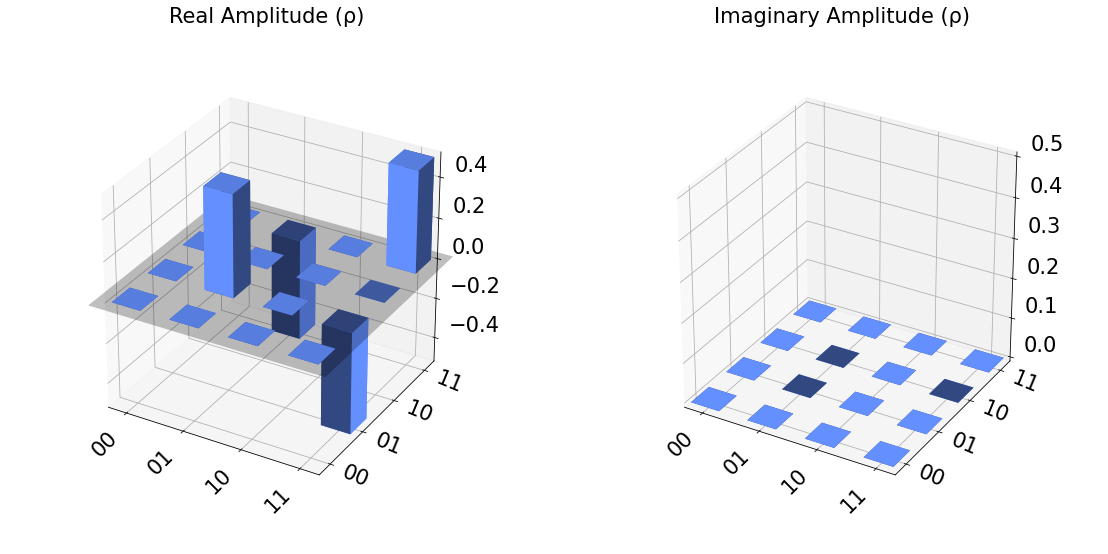

In [33]:
simulator_state = Aer.get_backend('statevector_simulator')

#execute the circuit
ch_gate = transpile(qc_ch, simulator_state)
job = simulator_state.run(ch_gate)

#grab results from the job
result = job.result()

#returns counts
psi= result.get_statevector(qc_ch)
print("\nQuantum state is: ", psi)

#plot a density matrix_plot
plot_state_city(psi)


# QSpher Plot for CH Gate

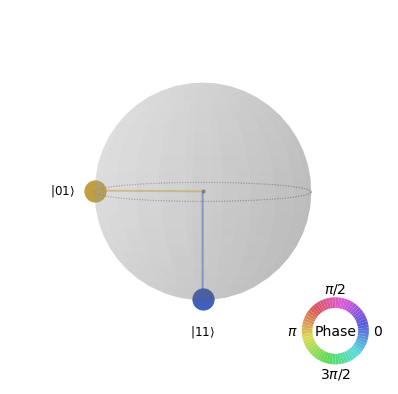

In [34]:
psi = result.get_statevector(qc_ch)
plot_state_qsphere(psi)
# |01> (i.e. |10>) as positive and |11> as negative

# Unitary operator for CH gate

In [35]:
backend = Aer.get_backend('unitary_simulator')

#execute the circuit
ch_unitary = transpile(qc_ch, backend)
job = backend.run(ch_unitary)
job.result().get_unitary(qc_ch, decimals = 3)

Operator([[ 0.   +0.j,  0.   +0.j,  0.   +0.j,  1.   -0.j],
          [ 0.707+0.j,  0.   +0.j,  0.707-0.j,  0.   +0.j],
          [ 0.   +0.j,  1.   +0.j,  0.   +0.j, -0.   +0.j],
          [-0.707+0.j,  0.   +0.j,  0.707-0.j,  0.   +0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


# Running CH gate circuit using QASM simulator

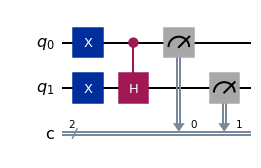

In [37]:
qc_ch = QuantumCircuit(2, 2, name = "qc")
qc_ch.x(0)
qc_ch.x(1)
qc_ch.ch(0,1)
qc_ch.measure([0,1], [0,1])
qc_ch.draw('mpl')

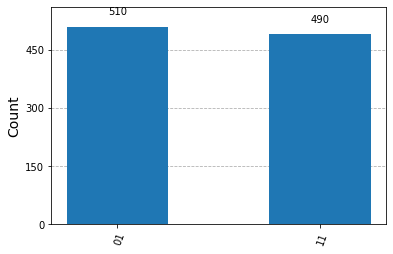

In [38]:
# Use Aer's qasm_simulator
backend = Aer.get_backend('qasm_simulator')

histo_job = transpile(qc_ch, backend)

job = backend.run(histo_job, shots = 1000)

result = job.result()

counts = result.get_counts(qc_ch)

plot_histogram (counts)

# CH gate using CNOT and Ry gates

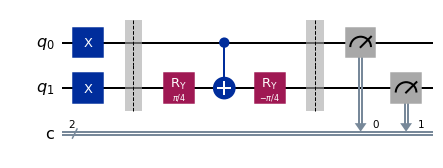

In [39]:
qc_ch = QuantumCircuit(2, 2, name = "qc")
qc_ch.x(0)
qc_ch.x(1)
qc_ch.barrier()
qc_ch.ry(pi/4,1) # Ry gate on 2nd qubit
qc_ch.cx(0,1) #CNOT gate
qc_ch.ry(-pi/4,1) # H gate on 2nd qubit
qc_ch.barrier()
qc_ch.measure([0,1], [0,1])
qc_ch.draw('mpl')

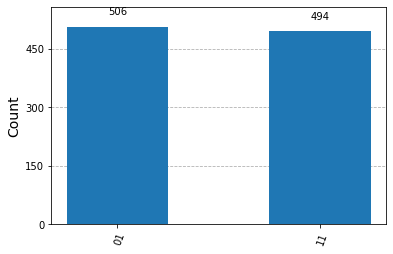

In [40]:
# Use Aer's qasm_simulator
backend = Aer.get_backend('qasm_simulator')

histo_job = transpile(qc_ch, backend)

job = backend.run(histo_job, shots = 1000)

result = job.result()

counts = result.get_counts(qc_ch)

plot_histogram (counts)